<a href="https://colab.research.google.com/github/Er-Yash/Optimizing-5G-Network-Performance-with-MLOps/blob/main/Optimizing_5G_Network_Performance_with_MLOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries and the dataset

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler

In [241]:
#importing the dataset

# path = r'C:\Users\admin\Desktop\Semester 2\Subjects\Machine Learning\Lab\Lab Evaluation 1\Dataset\Quality of Service 5G.csv'
path = r'/content/Quality of Service 5G.csv'
data = pd.read_csv(path)

data

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


## Data Preprocessing

In [242]:
print("First 10 rows of the dataset:\n")

data.head(10)

First 10 rows of the dataset:



,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
5,9/3/2023 10:00,User_6,Background_Download,-90 dBm,50 ms,500 Kbps,550 Kbps,70%
6,9/3/2023 10:00,User_7,Web_Browsing,-88 dBm,30 ms,1 Mbps,1 Mbps,60%
7,9/3/2023 10:00,User_8,IoT_Temperature,-95 dBm,100 ms,10 Kbps,15 Kbps,50%
8,9/3/2023 10:00,User_9,Video_Streaming,-82 dBm,35 ms,3 Mbps,3.5 Mbps,80%
9,9/3/2023 10:00,User_10,File_Download,-75 dBm,45 ms,2 Mbps,2 Mbps,70%


In [243]:
print("Last 10 rows of the dataset:\n")

data.tail(10)

Last 10 rows of the dataset:



,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
390,9/3/2023 10:06,User_391,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%
391,9/3/2023 10:06,User_392,Web_Browsing,-112 dBm,0 ms,0.1 Mbps,0.1 Mbps,70%
392,9/3/2023 10:06,User_393,Background_Download,-123 dBm,78 ms,350 Kbps,350 Kbps,60%
393,9/3/2023 10:06,User_394,VoIP_Call,-56 dBm,52 ms,0 Kbps,0 Kbps,90%
394,9/3/2023 10:06,User_395,Online_Gaming,-41 dBm,47 ms,6.3 Mbps,6.6 Mbps,80%
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%
399,9/3/2023 10:06,User_400,Web_Browsing,-113 dBm,0 ms,0.1 Mbps,0.1 Mbps,70%


In [244]:
print("Summary of the dataset:\n")

data.describe()

Summary of the dataset:



,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [245]:
print("Information about the dataset:\n")

data.info()

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [246]:
#converting 'application_type' categorical variable to numerical type

#Using One-Hot Encoding
one_hot = pd.get_dummies(data['Application_Type'], prefix='Application_Type')

#Concatenating the encoded columns with the original dataframe
data = pd.concat([data, one_hot], axis = 1)

data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Application_Type_Background_Download,Application_Type_Emergency_Service,Application_Type_File_Download,Application_Type_IoT_Temperature,Application_Type_Online_Gaming,Application_Type_Streaming,Application_Type_Video_Call,Application_Type_Video_Streaming,Application_Type_VoIP_Call,Application_Type_Voice_Call,Application_Type_Web_Browsing
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%,False,False,False,False,False,False,True,False,False,False,False
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%,False,False,False,False,False,False,False,False,False,True,False
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%,False,False,False,False,False,True,False,False,False,False,False
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%,False,True,False,False,False,False,False,False,False,False,False
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%,False,False,False,False,True,False,False,False,False,False,False


In [247]:
#Removing 'User_ID' from the dataset
data.drop('User_ID', axis = 1, inplace = True)

data.head()

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Application_Type_Background_Download,Application_Type_Emergency_Service,Application_Type_File_Download,Application_Type_IoT_Temperature,Application_Type_Online_Gaming,Application_Type_Streaming,Application_Type_Video_Call,Application_Type_Video_Streaming,Application_Type_VoIP_Call,Application_Type_Voice_Call,Application_Type_Web_Browsing
0,9/3/2023 10:00,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%,False,False,False,False,False,False,True,False,False,False,False
1,9/3/2023 10:00,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%,False,False,False,False,False,False,False,False,False,True,False
2,9/3/2023 10:00,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%,False,False,False,False,False,True,False,False,False,False,False
3,9/3/2023 10:00,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%,False,True,False,False,False,False,False,False,False,False,False
4,9/3/2023 10:00,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%,False,False,False,False,True,False,False,False,False,False,False


In [248]:
#Filtering the data of 'Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth' and 'Resource_Allocation'

# Define a function to extract numeric part from strings with units
def extract_numeric(value):
    if isinstance(value, str):
        numeric_part = re.search(r'(-?\d+\.?\d*)', value)
        if numeric_part:
            return float(numeric_part.group())
        else:
            return None
    else:
        return None

# Convert columns to appropriate data types after removing units
data['Signal_Strength'] = data['Signal_Strength'].apply(extract_numeric)
data['Latency'] = data['Latency'].apply(extract_numeric)
data['Required_Bandwidth'] = data['Required_Bandwidth'].apply(extract_numeric)
data['Allocated_Bandwidth'] = data['Allocated_Bandwidth'].apply(extract_numeric)
data['Resource_Allocation'] = data['Resource_Allocation'].str.rstrip('%').astype(float) / 100.0

data.head()

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Application_Type_Background_Download,Application_Type_Emergency_Service,Application_Type_File_Download,Application_Type_IoT_Temperature,Application_Type_Online_Gaming,Application_Type_Streaming,Application_Type_Video_Call,Application_Type_Video_Streaming,Application_Type_VoIP_Call,Application_Type_Voice_Call,Application_Type_Web_Browsing
0,9/3/2023 10:00,Video_Call,-75.0,30.0,10.0,15.0,0.70,False,False,False,False,False,False,True,False,False,False,False
1,9/3/2023 10:00,Voice_Call,-80.0,20.0,100.0,120.0,0.80,False,False,False,False,False,False,False,False,False,True,False
2,9/3/2023 10:00,Streaming,-85.0,40.0,5.0,6.0,0.75,False,False,False,False,False,True,False,False,False,False,False
3,9/3/2023 10:00,Emergency_Service,-70.0,10.0,1.0,1.5,0.90,False,True,False,False,False,False,False,False,False,False,False
4,9/3/2023 10:00,Online_Gaming,-78.0,25.0,2.0,3.0,0.85,False,False,False,False,True,False,False,False,False,False,False


In [249]:
# Standardize Signal_Strength and Latency

scaler = StandardScaler()
data[['Signal_Strength', 'Latency']] = scaler.fit_transform(data[['Signal_Strength', 'Latency']])

data.head()

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Application_Type_Background_Download,Application_Type_Emergency_Service,Application_Type_File_Download,Application_Type_IoT_Temperature,Application_Type_Online_Gaming,Application_Type_Streaming,Application_Type_Video_Call,Application_Type_Video_Streaming,Application_Type_VoIP_Call,Application_Type_Voice_Call,Application_Type_Web_Browsing
0,9/3/2023 10:00,Video_Call,0.265777,-0.181316,10.0,15.0,0.70,False,False,False,False,False,False,True,False,False,False,False
1,9/3/2023 10:00,Voice_Call,0.023942,-0.655346,100.0,120.0,0.80,False,False,False,False,False,False,False,False,False,True,False
2,9/3/2023 10:00,Streaming,-0.217894,0.292713,5.0,6.0,0.75,False,False,False,False,False,True,False,False,False,False,False
3,9/3/2023 10:00,Emergency_Service,0.507612,-1.129376,1.0,1.5,0.90,False,True,False,False,False,False,False,False,False,False,False
4,9/3/2023 10:00,Online_Gaming,0.120676,-0.418331,2.0,3.0,0.85,False,False,False,False,True,False,False,False,False,False,False


In [250]:
# Create a new feature: Bandwidth Utilization Ratio

data['Bandwidth_Utilization_Ratio'] = data['Allocated_Bandwidth'] / data['Required_Bandwidth']

In [251]:
#Shifting 'Resource Allocation' to the last

resource = data.pop('Resource_Allocation')

data['Resource_Allocation'] = resource

data.head()

,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Application_Type_Background_Download,Application_Type_Emergency_Service,Application_Type_File_Download,Application_Type_IoT_Temperature,Application_Type_Online_Gaming,Application_Type_Streaming,Application_Type_Video_Call,Application_Type_Video_Streaming,Application_Type_VoIP_Call,Application_Type_Voice_Call,Application_Type_Web_Browsing,Bandwidth_Utilization_Ratio,Resource_Allocation
0,9/3/2023 10:00,Video_Call,0.265777,-0.181316,10.0,15.0,False,False,False,False,False,False,True,False,False,False,False,1.5,0.70
1,9/3/2023 10:00,Voice_Call,0.023942,-0.655346,100.0,120.0,False,False,False,False,False,False,False,False,False,True,False,1.2,0.80
2,9/3/2023 10:00,Streaming,-0.217894,0.292713,5.0,6.0,False,False,False,False,False,True,False,False,False,False,False,1.2,0.75
3,9/3/2023 10:00,Emergency_Service,0.507612,-1.129376,1.0,1.5,False,True,False,False,False,False,False,False,False,False,False,1.5,0.90
4,9/3/2023 10:00,Online_Gaming,0.120676,-0.418331,2.0,3.0,False,False,False,False,True,False,False,False,False,False,False,1.5,0.85


## Exploratory Data Analysis

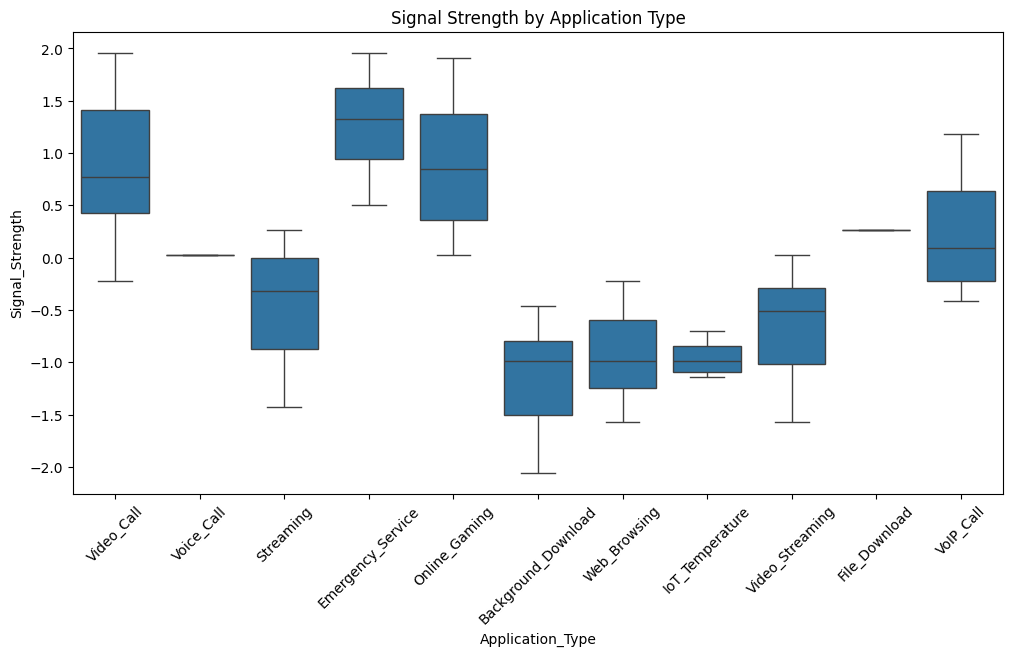

In [252]:
# Visualizing Signal_Strength by Application_Type

plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Signal_Strength', data = data)
plt.title('Signal Strength by Application Type')
plt.xticks(rotation=45)
plt.show()

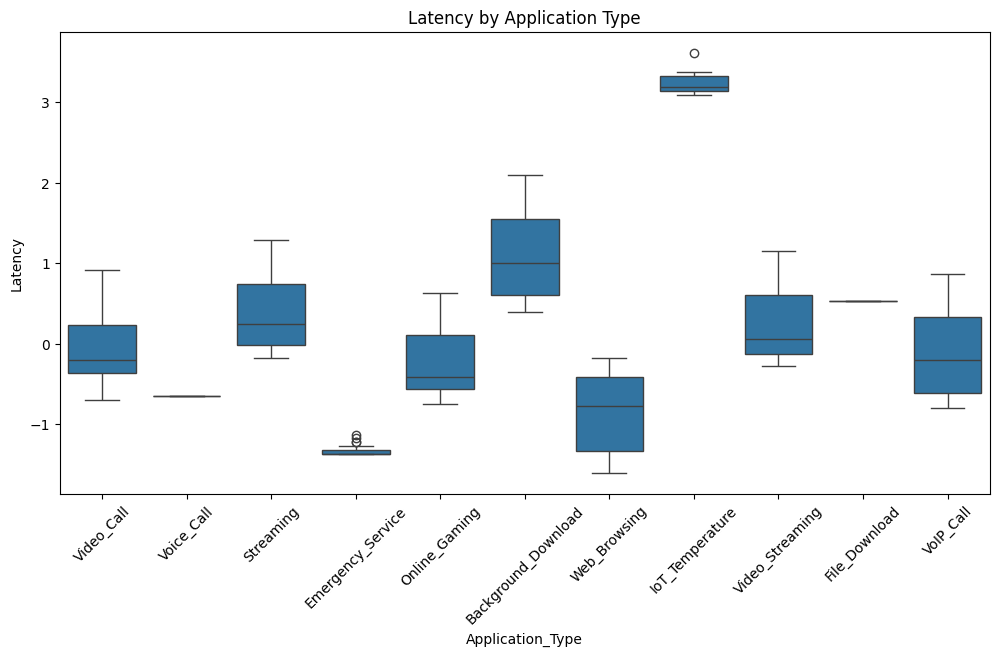

In [253]:
# Visualizing Latency by Application_Type

plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Latency', data = data)
plt.title('Latency by Application Type')
plt.xticks(rotation=45)
plt.show()

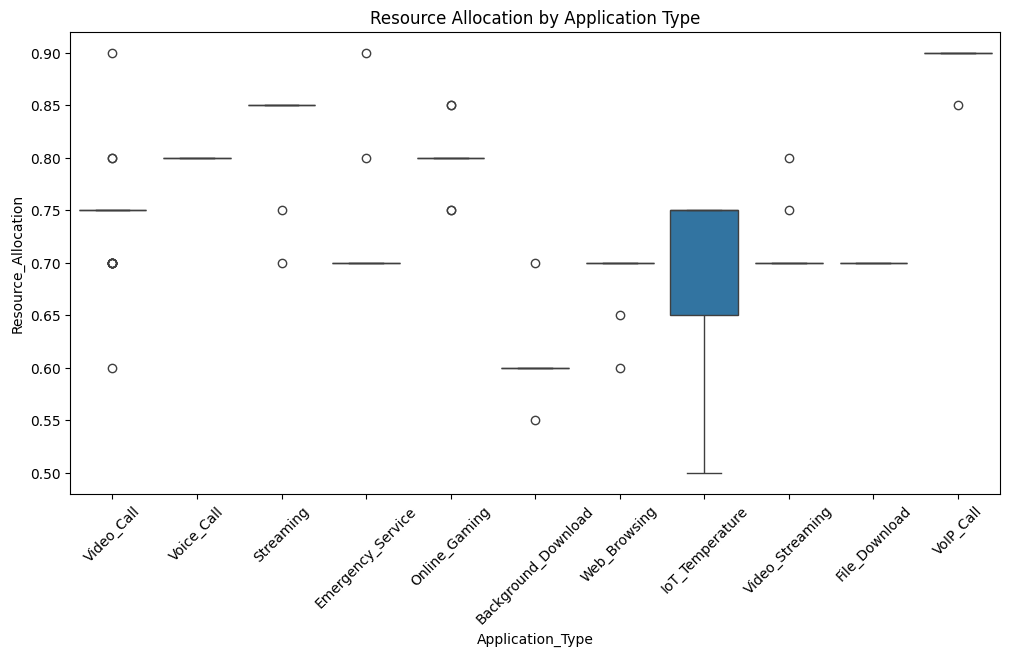

In [254]:
# Visualizing Resource_Allocation by Application_Type

plt.figure(figsize=(12, 6))
sns.boxplot(x='Application_Type', y='Resource_Allocation', data = data)
plt.title('Resource Allocation by Application Type')
plt.xticks(rotation=45)
plt.show()

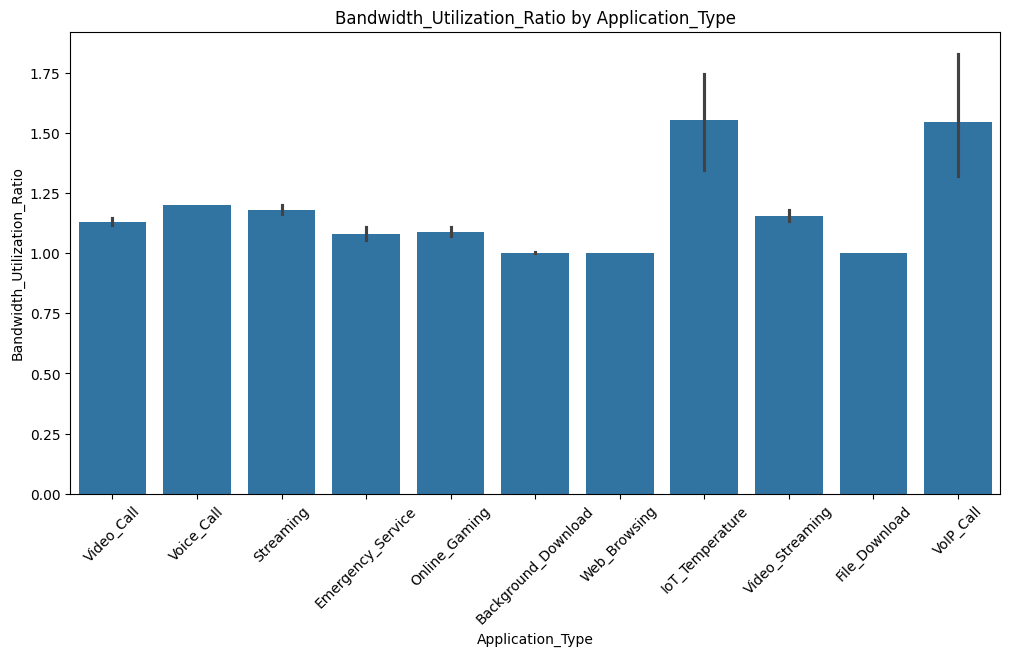

In [255]:
# Visualizing Bandwidth_Utilization_Ratio by Application_Type

plt.figure(figsize=(12, 6))
sns.barplot(x='Application_Type', y='Bandwidth_Utilization_Ratio', data = data)
plt.title('Bandwidth_Utilization_Ratio by Application_Type')
plt.xticks(rotation=45)
plt.show()

In [256]:
#Remove 'Application_Type' since it has already been converted to numeric type
#Remove 'Required_Bandwidth' and 'Allocated_Bandwidth' because they were already used for feature engineering

data.drop('Application_Type', axis = 1, inplace = True)
data.drop('Required_Bandwidth', axis = 1, inplace = True)
data.drop('Allocated_Bandwidth', axis = 1, inplace = True)

data.head()

,Timestamp,Signal_Strength,Latency,Application_Type_Background_Download,Application_Type_Emergency_Service,Application_Type_File_Download,Application_Type_IoT_Temperature,Application_Type_Online_Gaming,Application_Type_Streaming,Application_Type_Video_Call,Application_Type_Video_Streaming,Application_Type_VoIP_Call,Application_Type_Voice_Call,Application_Type_Web_Browsing,Bandwidth_Utilization_Ratio,Resource_Allocation
0,9/3/2023 10:00,0.265777,-0.181316,False,False,False,False,False,False,True,False,False,False,False,1.5,0.70
1,9/3/2023 10:00,0.023942,-0.655346,False,False,False,False,False,False,False,False,False,True,False,1.2,0.80
2,9/3/2023 10:00,-0.217894,0.292713,False,False,False,False,False,True,False,False,False,False,False,1.2,0.75
3,9/3/2023 10:00,0.507612,-1.129376,False,True,False,False,False,False,False,False,False,False,False,1.5,0.90
4,9/3/2023 10:00,0.120676,-0.418331,False,False,False,False,True,False,False,False,False,False,False,1.5,0.85


In [257]:
data.describe()

,Signal_Strength,Latency,Bandwidth_Utilization_Ratio,Resource_Allocation
count,4.000000e+02,4.000000e+02,398.000000,400.000000
mean,2.087219e-16,-1.509903e-16,inf,0.747125
std,1.001252e+00,1.001252e+00,NaN,0.089823
min,-2.055842e+00,-1.603406e+00,1.000000,0.500000
25%,-8.466655e-01,-5.723910e-01,1.000000,0.700000
50%,-1.211595e-01,-1.339134e-01,1.103448,0.700000
75%,7.978147e-01,5.297283e-01,1.166667,0.800000
max,1.958624e+00,3.610922e+00,inf,0.900000


In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Timestamp                             400 non-null    object 
 1   Signal_Strength                       400 non-null    float64
 2   Latency                               400 non-null    float64
 3   Application_Type_Background_Download  400 non-null    bool   
 4   Application_Type_Emergency_Service    400 non-null    bool   
 5   Application_Type_File_Download        400 non-null    bool   
 6   Application_Type_IoT_Temperature      400 non-null    bool   
 7   Application_Type_Online_Gaming        400 non-null    bool   
 8   Application_Type_Streaming            400 non-null    bool   
 9   Application_Type_Video_Call           400 non-null    bool   
 10  Application_Type_Video_Streaming      400 non-null    bool   
 11  Application_Type_Vo

In [259]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [260]:
# Define the number of observations to use for testing
n_test = 35  # Adjust according to your dataset

# Split data into train and test sets
train_data = data['Resource_Allocation'][:-n_test]
test_data = data['Resource_Allocation'][-n_test:]

In [261]:
# Define the number of lag observations
lags = 10  # Adjust according to your dataset and desired number of lag observations

model = AutoReg(train_data, lags=lags)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

error = mean_squared_error(test_data, predictions)

In [262]:
# print('Test MSE: %.5f' % error)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data.values, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data.values, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(test_data.values, predictions, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.04557150007571437
Mean Squared Error (MSE): 0.0037721829452766237
Root Mean Squared Error (RMSE): 0.061418099492548804


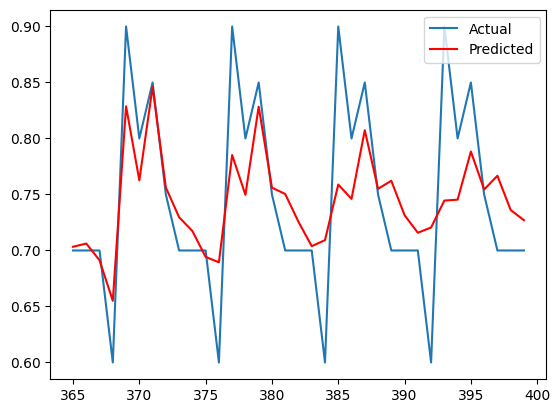

In [263]:
# Step 8: Visualize Results
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, color='red', label='Predicted')
plt.legend()
plt.show()

In [264]:
# from sklearn.metrics import accuracy_score

# # Assuming y_true contains the true labels and y_pred contains the predicted labels
# accuracy = accuracy_score(y_true, y_pred)

# print("Accuracy:", accuracy)




In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse

# Load and preprocess network performance data
# Assuming data is loaded into a pandas DataFrame 'df' with 'timestamp' and 'throughput' columns
# Replace 'throughput' with the appropriate network performance metric

path = r'/content/Quality of Service 5G.csv'
df = pd.read_csv(path)


# df = pd.read_csv('your_data.csv')



# Convert 'timestamp' column to datetime format and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample data to hourly frequency (or adjust as needed)
df_hourly = df.resample('H').mean().fillna(method='ffill')

# Split data into train and test sets
train_size = int(0.8 * len(df_hourly))
train_data = df_hourly.iloc[:train_size]
test_data = df_hourly.iloc[train_size:]

# Plot ACF and PACF to determine SARIMA parameters
plot_acf(train_data['throughput'], lags=50)
plot_pacf(train_data['throughput'], lags=50)
plt.show()

# Choose SARIMA parameters based on ACF and PACF plots
# Example parameters (p, d, q) = (1, 1, 1), (P, D, Q, S) = (1, 0, 1, 24)
p, d, q = 1, 1, 1
P, D, Q, S = 1, 0, 1, 24

# Fit SARIMA model to training data
sarima_model = SARIMAX(train_data['throughput'], order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit()

# Make predictions on test data
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = sarima_result.predict(start=start_idx, end=end_idx, dynamic=False)

# Evaluate model performance
test_rmse = rmse(test_data['throughput'], predictions)
print(f'Test RMSE: {test_rmse}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['throughput'], label='Train')
plt.plot(test_data.index, test_data['throughput'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.title('Actual vs. Predicted Throughput')
plt.xlabel('Timestamp')
plt.ylabel('Throughput')
plt.show()


KeyError: 'timestamp'

In [266]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tools.eval_measures import rmse

# # Placeholder for loading network performance data
# # Replace this with your actual data loading logic
# # df = pd.read_csv('your_data.csv')

# # Placeholder preprocessing steps
# # Convert 'timestamp' column to datetime format and set as index
# # Resample data to hourly frequency (or adjust as needed)

# # Split data into train and test sets
# train_size = int(0.8 * len(df))
# train_data = df.iloc[:train_size]
# test_data = df.iloc[train_size:]

# # Plot ACF and PACF to determine SARIMA parameters
# plot_acf(train_data['throughput'], lags=50)
# plot_pacf(train_data['throughput'], lags=50)
# plt.show()

# # Choose SARIMA parameters based on ACF and PACF plots
# # Example parameters (p, d, q) = (1, 1, 1), (P, D, Q, S) = (1, 0, 1, 24)
# p, d, q = 1, 1, 1
# P, D, Q, S = 1, 0, 1, 24

# # Fit SARIMA model to training data
# sarima_model = SARIMAX(train_data['throughput'], order=(p, d, q), seasonal_order=(P, D, Q, S))
# sarima_result = sarima_model.fit()

# # Make predictions on test data
# start_idx = len(train_data)
# end_idx = len(train_data) + len(test_data) - 1
# predictions = sarima_result.predict(start=start_idx, end=end_idx, dynamic=False)

# # Evaluate model performance
# test_rmse = rmse(test_data['throughput'], predictions)
# print(f'Test RMSE: {test_rmse}')

# # Plot actual vs. predicted values
# plt.figure(figsize=(12, 6))
# plt.plot(train_data.index, train_data['throughput'], label='Train')
# plt.plot(test_data.index, test_data['throughput'], label='Test')
# plt.plot(test_data.index, predictions, label='Predictions')
# plt.legend()
# plt.title('Actual vs. Predicted Throughput')
# plt.xlabel('Timestamp')
# plt.ylabel('Throughput')
# plt.show()



NameError: name 'df' is not defined